# Contents

In [1]:
## Imports
## Exclusion of Low Activity
## Regions
## Customer Profile
## Income Profile
## Visualizations
## Department Profile
## Customer Marital/Dependants Analysis
## Aggregates
## Regional Analysis
## Export Dataframe

# Imports 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\bwink\Downloads\Achievement 4'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [5]:
departments = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
#Replace extreme outliers with null values
df.loc[df['prices'] >100, 'prices'] = np.nan

In [7]:
df.loc[df['prices'].idxmax()]

user_id                                               6965
First                                              Brandon
Last                                                  Mata
Gender                                                Male
State                                         North Dakota
Age                                                     70
date_joined                                       1/1/2017
number_of_dependants                                     0
marital_status                            divorced/widowed
income                                              100091
product_id                                            9020
product_name              Boneless Skinless Chicken Thighs
aisle_id                                                35
department_id                                           12
prices                                                25.0
order_id                                           2224170
eval_set                                             pri

In [8]:
# Delete PII, problematic info

In [9]:
df = df.drop(columns=['First', 'Last'])

In [10]:
df.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Least busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


## Exclusion of Low Activity

In [11]:
# Exclusion
df['max_order'].head()

0    8
1    8
2    8
3    8
4    8
Name: max_order, dtype: int64

In [12]:
#subset for orders
df_max = df[df['max_order']>5]

In [13]:
df_max.shape

(28521639, 31)

In [14]:
df.shape

(30629741, 31)

In [15]:
#export
df_max.to_pickle(os.path.join(path, 'Data','Prepared Data', 'df_orders_over_5.pkl'))

# Regions

In [16]:
#Create Regions from States info
result = []

for value in df["State"]:
  if value == 'Maine':
    result.append("Northeast")
  elif value == 'New Hampshire':
    result.append("Northeast")
  elif value == 'Vermont':
    result.append("Northeast")
  elif value == 'Massachusetts':
    result.append("Northeast")
  elif value == 'Rhode Island':
    result.append("Northeast")
  elif value == 'Connecticut':
    result.append("Northeast")
  elif value == 'New York':
    result.append("Northeast")
  elif value == 'Pennsylvania':
    result.append("Northeast")
  elif value == 'New Jersey':
    result.append("Northeast")  
    
  elif value == 'Wisconsin':
    result.append("Midwest")
  elif value == 'Michigan':
    result.append("Midwest")
  elif value == 'Illinois':
    result.append("Midwest")
  elif value == 'Indiana':
    result.append("Midwest")
  elif value == 'Ohio':
    result.append("Midwest")
  elif value == 'North Dakota':
    result.append("Midwest")
  elif value == 'South Dakota':
    result.append("Midwest")
  elif value == 'Nebraska':
    result.append("Midwest")
  elif value == 'Kansas':
    result.append("Midwest")
  elif value == 'Minnesota':
    result.append("Midwest")
  elif value == 'Iowa':
    result.append("Midwest")
  elif value == 'Missouri':
    result.append("Midwest")  
    
  elif value == 'Idaho':
    result.append("West")
  elif value == 'Montana':
    result.append("West")
  elif value == 'Wyoming':
    result.append("West")
  elif value == 'Nevada':
    result.append("West")
  elif value == 'Utah':
    result.append("West")
  elif value == 'Colorado':
    result.append("West")
  elif value == 'Arizona':
    result.append("West")
  elif value == 'New Mexico':
    result.append("West")
  elif value == 'Alaska':
    result.append("West")
  elif value == 'Washington':
    result.append("West")
  elif value == 'Oregon':
    result.append("West")
  elif value == 'California':
    result.append("West")
  elif value == 'Hawaii':
    result.append("West")  
    
  else:
    result.append("South")

In [17]:
df['Region'] = result

In [18]:
df['Region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: Region, dtype: int64

In [19]:
# Spending by Region
regional_spending = df.groupby(['Region','spending_flag']).size().unstack(fill_value=0)

Text(0.5, 0, '')

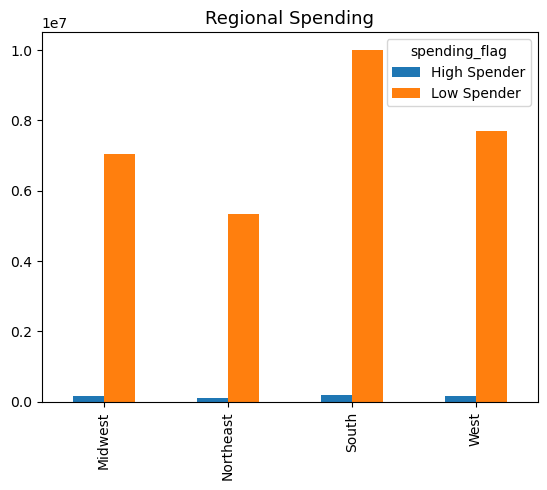

In [20]:
bar_reg_spending = regional_spending.plot.bar(stacked=False)
plt.title('Regional Spending',fontsize=13)
plt.xlabel('')

In [21]:
bar_reg_spending.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'reg_spending.png'))

In [22]:
# Textual Representation
Text_region_spending = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [23]:
Text_region_spending

spending_flag,High Spender,Low Spender
Region,,
Midwest,149817,7027107
Northeast,101420,5320605
South,196523,10002459
West,147803,7684007


# Customer Profile

In [24]:
# Age profiling
df['Age'].describe()

count    3.062974e+07
mean     4.947348e+01
std      1.847859e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [25]:
#flags
df.loc[df['Age']>= 65, 'age_group'] = 'Senior'

In [26]:
df.loc[(df['Age'] < 65) & (df['Age'] >= 35), 'age_group'] = 'Middle Age'

In [27]:
df.loc[df['Age'] <35, 'age_group'] = 'Young Adult'

In [28]:
df['age_group'].value_counts(dropna = False)

Middle Age     14392922
Young Adult     8139248
Senior          8097571
Name: age_group, dtype: int64

# Income Profile

In [29]:
# income profiling
df['income'].describe()

count    3.062974e+07
mean     9.945980e+04
std      4.306626e+04
min      2.590300e+04
25%      6.706600e+04
50%      9.661200e+04
75%      1.279340e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
# flags
df.loc[df['income'] <70000, 'income_group'] = 'Lower income'

In [31]:
df.loc[(df['income'] >=70000) & (df['income'] < 125000), 'income_group'] = 'Middle income'

In [32]:
df.loc[df['income'] >= 125000, 'income_group'] = 'Higher income'

## Visualizations


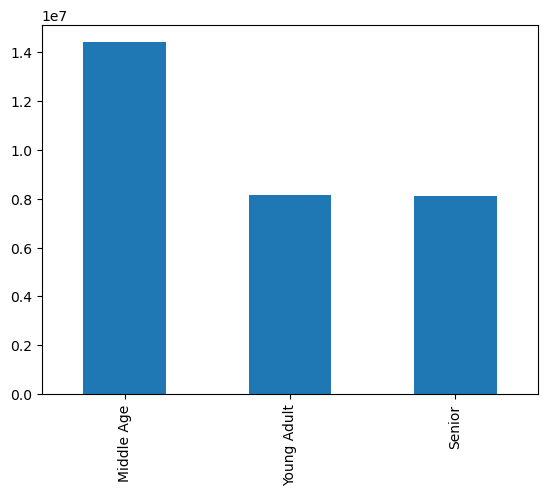

In [33]:
# age_chart
age_bar_final = df['age_group'].value_counts().plot.bar()

In [34]:
# exporting bar chart
age_bar_final.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_bar_final.png'))

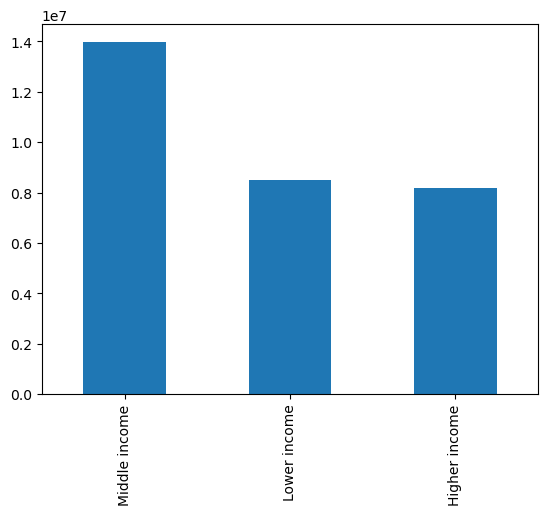

In [35]:
# Income chart
income_bar_final = df['income_group'].value_counts().plot.bar()

In [36]:
income_bar_final.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_bar_final.png'))

# Department Profile

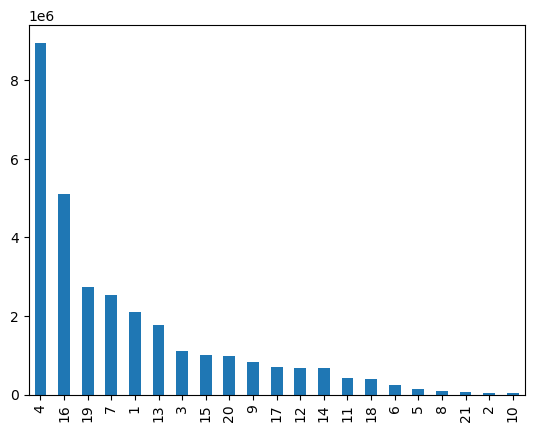

In [37]:
# Department Popularity Chart
bar_dept = df['department_id'].value_counts().plot.bar()

In [38]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [39]:
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [40]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [41]:
#merge to df by individual values in department_id column
df.loc[df['department_id'] == 1, 'Department'] = 'Frozen'
df.loc[df['department_id'] == 2, 'Department'] = 'Other'
df.loc[df['department_id'] == 3, 'Department'] = 'Bakery'
df.loc[df['department_id'] == 4, 'Department'] = 'Produce'
df.loc[df['department_id'] == 5, 'Department'] = 'Alcohol'
df.loc[df['department_id'] == 6, 'Department'] = 'International'
df.loc[df['department_id'] == 7, 'Department'] = 'Beverages'
df.loc[df['department_id'] == 8, 'Department'] = 'Pets'
df.loc[df['department_id'] == 9, 'Department'] = 'Dry Goods Pasta'
df.loc[df['department_id'] == 10, 'Department'] = 'Bulk'
df.loc[df['department_id'] == 11, 'Department'] = 'Personal Care'
df.loc[df['department_id'] == 12, 'Department'] = 'Meat/Seafood'
df.loc[df['department_id'] == 13, 'Department'] = 'Pantry'
df.loc[df['department_id'] == 14, 'Department'] = 'Breakfast'
df.loc[df['department_id'] == 15, 'Department'] = 'Canned Goods'
df.loc[df['department_id'] == 16, 'Department'] = 'Dairy/Eggs'
df.loc[df['department_id'] == 17, 'Department'] = 'Household'
df.loc[df['department_id'] == 18, 'Department'] = 'Babies'
df.loc[df['department_id'] == 19, 'Department'] = 'Snacks'
df.loc[df['department_id'] == 20, 'Department'] = 'Deli'
df.loc[df['department_id'] == 21, 'Department'] = 'Missing'

In [42]:
#check
df['Department'].value_counts(dropna = False)

Produce            8963496
Dairy/Eggs         5101185
Snacks             2730482
Beverages          2540159
Frozen             2113059
Pantry             1771171
Bakery             1108540
Canned Goods       1009660
Deli                993564
Dry Goods Pasta     819814
Household           696686
Meat/Seafood        671242
Breakfast           663250
Personal Care       421568
Babies              400378
International       254641
Alcohol             146535
Pets                 92253
Missing              65411
Other                34035
Bulk                 32612
Name: Department, dtype: int64

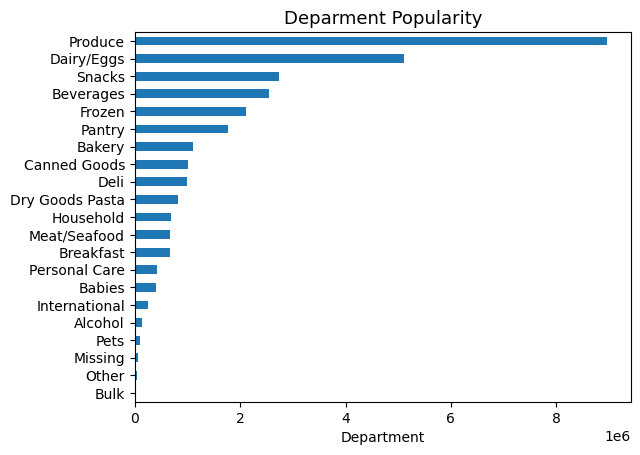

In [43]:
#bar chart for popularity of departments
bar_dept = df['Department'].value_counts().sort_values().plot.barh()
plt.ylabel('')
plt.xlabel('Department')
plt.title('Deparment Popularity',fontsize=13)
plt.show()

In [44]:
bar_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_dept_pop.png'))

In [45]:
# bar chart for department by dependants
dep_dept_count = df.groupby(['Department','number_of_dependants']).size().unstack(fill_value=0)

Text(0.5, 0, 'Department')

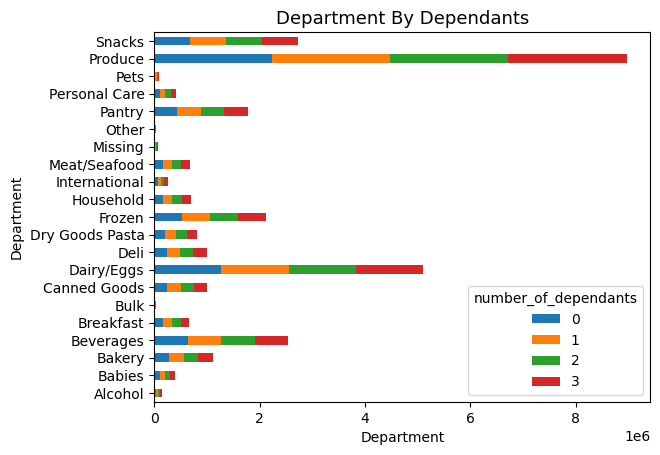

In [46]:
bar_dep_dept_count = dep_dept_count.sort_values(['Department']).plot.barh(stacked=True)
plt.title('Department By Dependants',fontsize=13)
plt.xlabel('Department')

In [47]:
bar_dep_dept_count.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_dept_dep.png'))

In [48]:
# Creating Popularity Chart for Departments by age group
age_department_count = df.groupby(['Department','age_group']).size().unstack(fill_value=0)

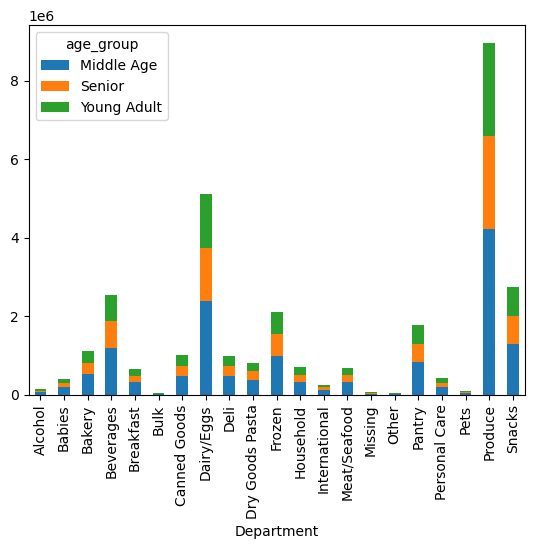

In [49]:
age_dept_bar = age_department_count.plot.bar(stacked=True)

In [50]:
age_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_dept_preference.png'))

In [51]:
# Creating Popularity Chart for Departments by income group
income_department_count = df.groupby(['Department','income_group']).size().unstack(fill_value=0)

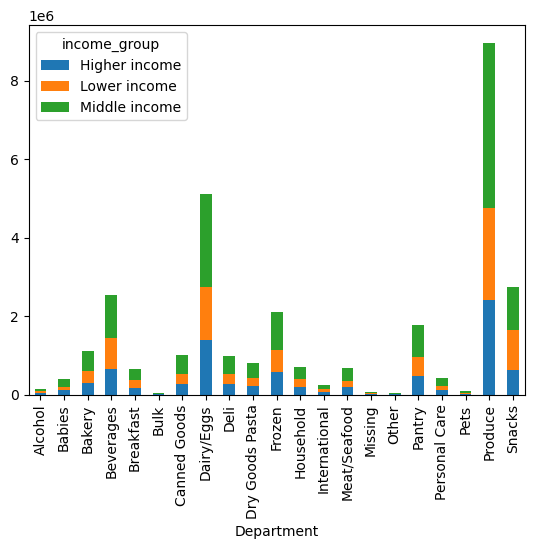

In [52]:
income_dept_bar = income_department_count.plot.bar(stacked=True)

In [53]:
income_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_dept_preference.png'))

# Customer Marital/Dependants Analysis

In [54]:
# marital status and income
marital_income_counts = df.groupby(['marital_status','income_group']).size().unstack(fill_value=0)

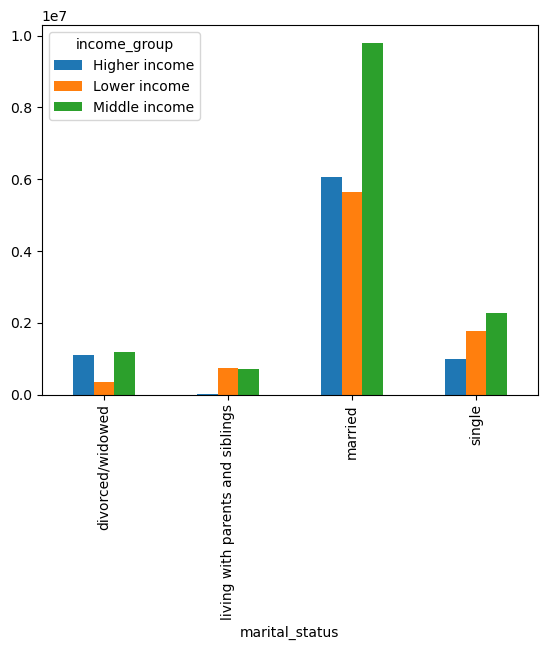

In [55]:
marital_income_counts = marital_income_counts.plot.bar(stacked=False )

In [56]:
marital_income_counts.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_income_final.png'))

In [57]:
# marital status and age
marital_age_counts = df.groupby(['marital_status','age_group']).size().unstack(fill_value=0)

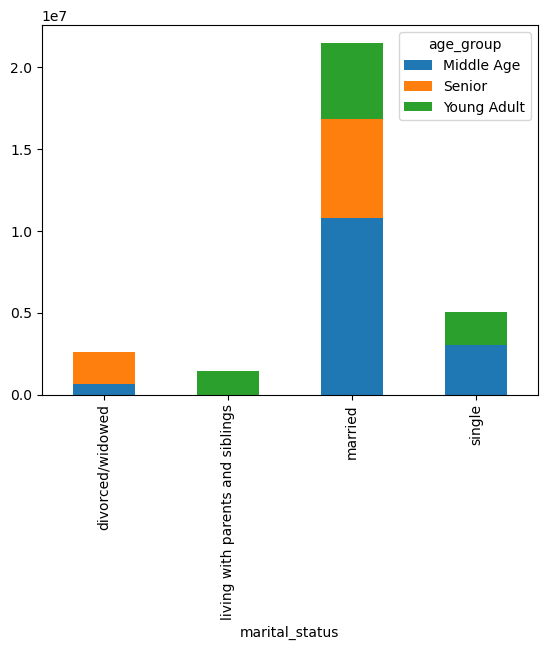

In [58]:
marital_age_bar = marital_age_counts.sort_index().plot.bar(stacked=True)

In [59]:
marital_age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_age_final.png'))

# Aggregates

In [60]:
# age and spending 
df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Middle Age   7.791580  1.0  25.0
Senior       7.797187  1.0  25.0
Young Adult  7.787264  1.0  25.0

In [61]:
# income and spending
df.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
Higher income  7.956838  1.0  25.0
Lower income   7.352350  1.0  25.0
Middle income  7.962735  1.0  25.0

In [62]:
# create dependant flag for simplified aggregates
df.loc[df['number_of_dependants'] == 0, 'dependants'] = 'No Dependants'

In [63]:
df.loc[df['number_of_dependants'] >= 1, 'dependants'] = 'Has Dependants'

In [64]:
df['dependants'].value_counts()

Has Dependants    22980043
No Dependants      7649698
Name: dependants, dtype: int64

In [65]:
# dependants and spending aggregations
df.groupby('dependants').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
dependants                         
Has Dependants  7.792702  1.0  25.0
No Dependants   7.789555  1.0  25.0

In [66]:
# marital status and prices
df.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.801055  1.0  25.0
living with parents and siblings  7.806768  1.0  25.0
married                           7.791740  1.0  25.0
single                            7.783529  1.0  25.0

In [67]:
# age and frequency
df.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Middle Age               11.114926  0.0  30.0
Senior                   11.080959  0.0  30.0
Young Adult              11.132158  0.0  30.0

In [68]:
# income and frequency
df.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_group                                   
Higher income              11.028248  0.0  30.0
Lower income               11.290482  0.0  30.0
Middle income              11.049773  0.0  30.0

In [69]:
# dependants and frequency
df.groupby('dependants').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
dependants                                      
Has Dependants              11.119048  0.0  30.0
No Dependants               11.084925  0.0  30.0

In [70]:
# marital status and frequency
df.groupby('marital_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
marital_status                                                    
divorced/widowed                              11.027251  0.0  30.0
living with parents and siblings              11.047268  0.0  30.0
married                                       11.123960  0.0  30.0
single                                        11.115149  0.0  30.0

# Regional Analysis

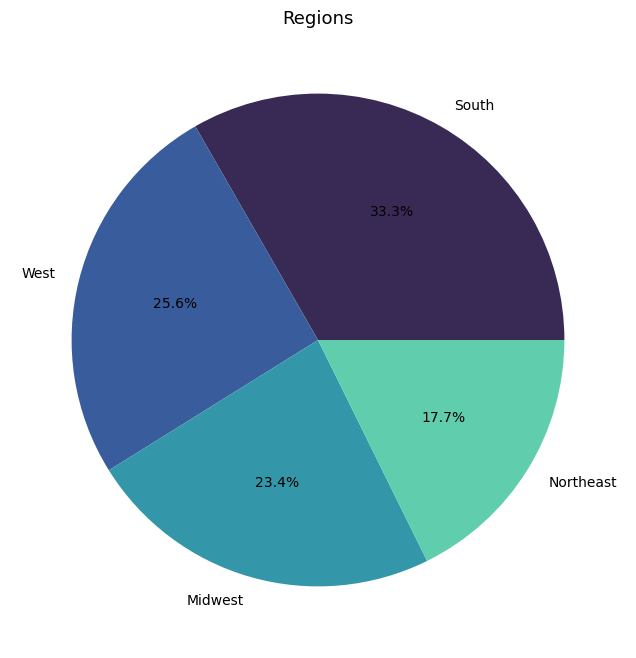

In [71]:
# Regional Customer Density
region_pie_chart = df['Region'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('mako', 4), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Regions',fontsize=13)
plt.show()

In [72]:
region_pie_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_pie_chart.png'))

In [73]:
# Area Region and Loyalty
#group Region and loyalty_flag
reg_loyalty_counts = df.groupby(['Region','loyalty_flag']).size().unstack(fill_value=0)

Text(0.5, 0, '')

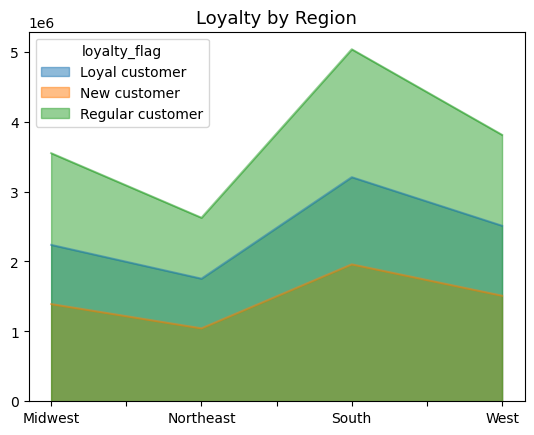

In [74]:
# Area chart for Region and loyalty_flag
area_reg_loyalty_counts = reg_loyalty_counts.plot.area(stacked=False)
plt.title('Loyalty by Region',fontsize=13)
plt.xlabel('')

In [75]:
#Save Image
area_reg_loyalty_counts.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'area_reg_loyalty_chart.png'))

In [76]:
# region and ages
region_age_group = df.groupby(['Region','age_group']).size().unstack(fill_value=0)

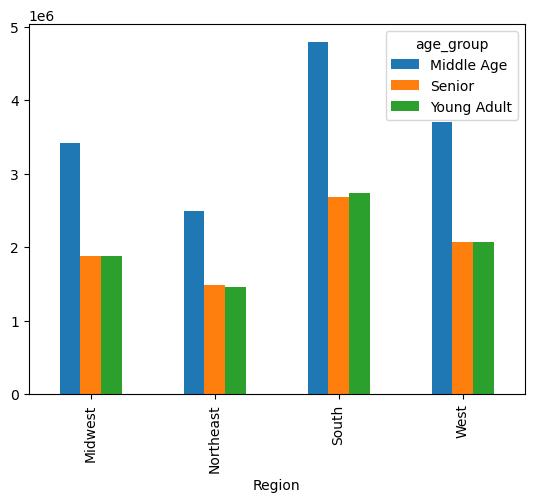

In [77]:
# bar chart
region_age_bar = region_age_group.sort_index().plot.bar(stacked=False )

In [78]:
region_age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_age_bar.png'))

In [79]:
# grouping
marital_region_counts = df.groupby(['Region','marital_status']).size().unstack(fill_value=0)

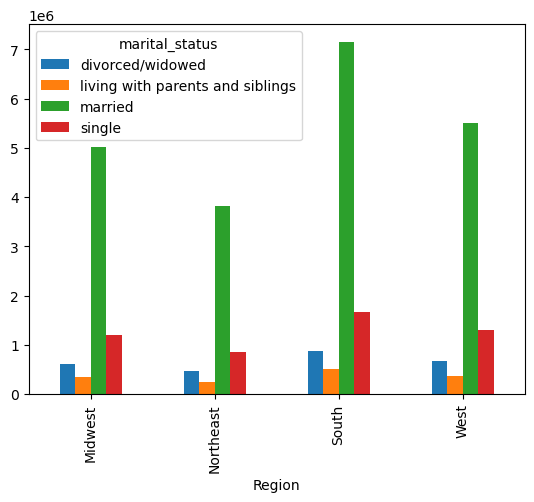

In [80]:
# bar
marital_reg_bar = marital_region_counts.sort_index().plot.bar(stacked=False)

In [81]:
marital_reg_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_reg_bar.png'))

In [82]:
# grouping
reg_income_count = df.groupby(['Region','income_group']).size().unstack(fill_value=0)

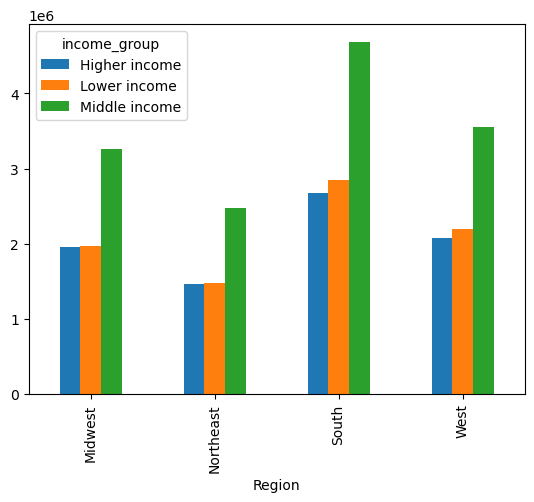

In [83]:
# bar
reg_income_bar = reg_income_count.sort_index().plot.bar(stacked=False)

In [84]:
reg_income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'reg_income_bar.png'))

In [85]:
# grouping for region and dependants
reg_dep_count = df.groupby(['Region', 'dependants']).size().unstack(fill_value=0)

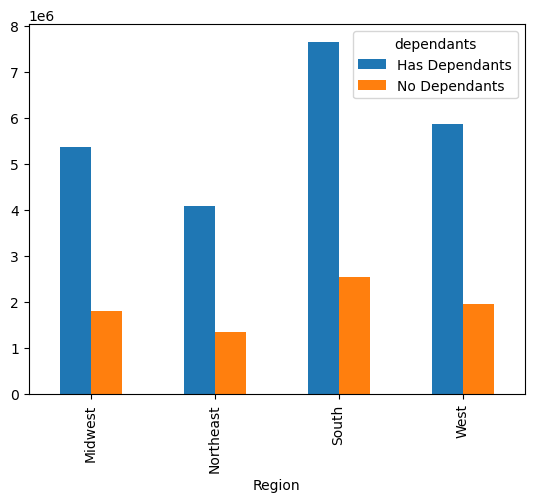

In [86]:
# bar chart for region and dependants
reg_dep_bar = reg_dep_count.sort_index().plot.bar(stacked=False)

In [87]:
reg_dep_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'reg_dep_bar.png'))

# Export Dataframe

In [88]:
df.to_pickle(os.path.join(path, 'Data','Prepared Data', 'insta_df_final.pkl'))

In [93]:
df['age_group'].value_counts()

Middle Age     14392922
Young Adult     8139248
Senior          8097571
Name: age_group, dtype: int64

In [94]:
df['spending_flag'].value_counts()

Low Spender     30034178
High Spender      595563
Name: spending_flag, dtype: int64

In [95]:
df['loyalty_flag'].value_counts()

Regular customer    15020190
Loyal customer       9707390
New customer         5902161
Name: loyalty_flag, dtype: int64

In [97]:
df['busiest_days'].value_counts()

Regularly busy     12206814
Busiest days       11220185
Least busy days     7202742
Name: busiest_days, dtype: int64